In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import os, imageio, random, copy

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import cv2

from PIL import Image

Using TensorFlow backend.


In [2]:
# mounting to google drive 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# This contains the location of all images in zip format

total_image_dataset_location = "gdrive/My Drive/Deep Learning/Assignment_2/Images"

for root, directories, files in os.walk(total_image_dataset_location) :
    for file_name in files :
        new_file_name = os.path.join(total_image_dataset_location, file_name)
        print(new_file_name)

gdrive/My Drive/Deep Learning/Assignment_2/Images/originalimages_part2.zip
gdrive/My Drive/Deep Learning/Assignment_2/Images/originalimages_part3.zip
gdrive/My Drive/Deep Learning/Assignment_2/Images/originalimages_part4.zip
gdrive/My Drive/Deep Learning/Assignment_2/Images/originalimages_part1.zip


In [0]:
# to unzip the images and put them in Extracted_Images directory

#!unzip "gdrive/My Drive/Deep Learning/Assignment_2/Images/originalimages_part1.zip" -d "gdrive/My Drive/Deep Learning/Assignment_2/Extracted_Images/"
#!unzip "gdrive/My Drive/Deep Learning/Assignment_2/Images/originalimages_part2.zip" -d "gdrive/My Drive/Deep Learning/Assignment_2/Extracted_Images/"
#!unzip "gdrive/My Drive/Deep Learning/Assignment_2/Images/originalimages_part3.zip" -d "gdrive/My Drive/Deep Learning/Assignment_2/Extracted_Images/"
#!unzip "gdrive/My Drive/Deep Learning/Assignment_2/Images/originalimages_part4.zip" -d "gdrive/My Drive/Deep Learning/Assignment_2/Extracted_Images/"

In [0]:
# division into training, validation and testing data
# Division : 70: 20: 10

total_image_dataset_location = "gdrive/My Drive/Deep Learning/Assignment_2/Extracted_Images/"
# im = imageio.imread(os.path.join(total_image_dataset_location + os.listdir(total_image_dataset_location)[0]))

image_list = sorted(os.listdir(total_image_dataset_location))

X_training_set = np.ndarray(shape=(2000, 288, 384, 1), dtype=np.float32)
X_validation_set = np.ndarray(shape=(400, 288, 384, 1), dtype=np.float32)
X_test_set = np.ndarray(shape=(400, 288, 384, 1), dtype=np.float32)

Y_training_set = np.ndarray(shape=(2000, 1), dtype=np.float32)
Y_validation_set = np.ndarray(shape=(400, 1), dtype=np.float32)
Y_test_set = np.ndarray(shape=(400, 1), dtype=np.float32)

images_per_person = 14

training_set_individual_size = 10
validation_set_individual_size = 2
test_set_individual_size = 2

for i in range(200) :
    print(i)
    
    person_images = copy.deepcopy(image_list[i * images_per_person: (i + 1) * images_per_person])
    random.shuffle(person_images)
    
#     print(person_images)
                
    for j in range(0, training_set_individual_size) :
        image = cv2.imread(os.path.join(total_image_dataset_location, person_images[j]))
        image = cv2.resize(image, (int(640 * 0.6), int(480 * 0.6)), interpolation = cv2.INTER_AREA)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # normalize
        image = (image) / 255
        image = np.reshape(image, (image.shape[0], image.shape[1], 1)) 
        X_training_set[i * training_set_individual_size + j] = image
        Y_training_set[i * training_set_individual_size + j] = i
        
    for j in range(training_set_individual_size, training_set_individual_size + validation_set_individual_size) :
        image = cv2.imread(os.path.join(total_image_dataset_location, person_images[j]))
        image = cv2.resize(image, (int(640 * 0.6), int(480 * 0.6)), interpolation = cv2.INTER_AREA)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # normalize
        image = (image) / 255
        image = np.reshape(image, (image.shape[0], image.shape[1], 1)) 
        X_validation_set[i * validation_set_individual_size + j - training_set_individual_size] = image
        Y_validation_set[i * validation_set_individual_size + j - training_set_individual_size] = i
        
    for j in range(training_set_individual_size + validation_set_individual_size, images_per_person) :
        image = cv2.imread(os.path.join(total_image_dataset_location, person_images[j]))
        image = cv2.resize(image, (int(640 * 0.6), int(480 * 0.6)), interpolation = cv2.INTER_AREA)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # normalize
        image = (image) / 255
        image = np.reshape(image, (image.shape[0], image.shape[1], 1)) 
        X_test_set[i * test_set_individual_size + j - (training_set_individual_size + validation_set_individual_size)] = image
        Y_test_set[i * test_set_individual_size + j - (training_set_individual_size + validation_set_individual_size)] = i                

In [0]:
# convert to categorical data
Y_training_set = keras.utils.to_categorical(Y_training_set)
Y_validation_set = keras.utils.to_categorical(Y_validation_set)
Y_test_set = keras.utils.to_categorical(Y_test_set)

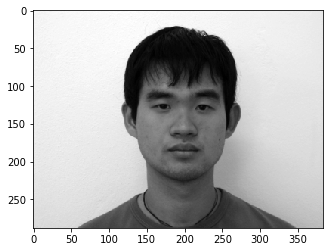

In [25]:
xxxx = np.reshape(np.ravel(X_test_set[2]), (288, 384))

# imgggg = Image.fromarray(np.uint8(xxxx *255), 'L')
# imgggg.show()

plt.imshow(xxxx, cmap='gray')
plt.show()

In [0]:
assignment_directory = "gdrive/My Drive/Deep Learning/Assignment_2/"

batch_size = 15
num_classes = 200
epochs = 1000
save_dir = os.path.join(assignment_directory, 'saved_models')
model_name = 'assignment_2_v1.h5'

In [0]:
# model
model = Sequential()

# layer 1
model.add(Conv2D(64, (3, 3), padding='same', strides=1,
                input_shape=X_training_set.shape[1 :]))
model.add(Activation('relu'))
          
# # layer 2
# model.add(Conv2D(64, (3, 3), padding='same', strides=1))
# model.add(Activation('relu'))
          
# max pool l2
model.add(MaxPooling2D(pool_size=(3, 3), strides=3))
          
# layer 3
model.add(Conv2D(128, (3, 3), padding='same', strides=1))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(5, 5), strides=3))

# # layer 4
model.add(Conv2D(128, (3, 3), padding='same', strides=1))
model.add(Activation('relu'))

# max pool l4
model.add(MaxPooling2D(pool_size=(5, 5), strides=3))

# layer 5
model.add(Conv2D(256, (3, 3), padding='same', strides=1))
model.add(Activation('relu'))

# layer 6
model.add(Conv2D(256, (3, 3), padding='same', strides=1))
model.add(Activation('relu'))

# max pool l6
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))


# layer 7
# model.add(Conv2D(512, (3, 3), padding='same', strides=1))
# model.add(Activation('relu'))

# # # layer 8
# # model.add(Conv2D(512, (3, 3), padding='same', strides=1))
# # model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(3, 3), strides=2))


# layer 9
# model.add(Conv2D(512, (3, 3), padding='same', strides=1))
# model.add(Activation('relu'))

# max pool l9

# # layer 10
# model.add(Conv2D(512, (3, 3), padding='same', strides=1))
# model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# # layer 11
# model.add(Conv2D(512, (3, 3), padding='same', strides=1))
# model.add(Activation('relu'))

# # layer 12
# model.add(Conv2D(512, (3, 3), padding='same', strides=1))
# model.add(Activation('relu'))

# # max pool l2
# model.add(MaxPooling2D(pool_size=(3, 3), strides=3))

# # layer 13
model.add(Flatten())
# model.add(Dense(10248))
# model.add(Activation('relu'))

# layer 14
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.3))

# layer 15
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Dense (16)
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 288, 384, 64)      640       
_________________________________________________________________
activation_33 (Activation)   (None, 288, 384, 64)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 96, 128, 64)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 96, 128, 128)      73856     
_________________________________________________________________
activation_34 (Activation)   (None, 96, 128, 128)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 42, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 31, 42, 128)      

In [0]:
# Adam optimizer
opt = keras.optimizers.Adam(0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [56]:
# checking for training data
model.fit(X_training_set, Y_training_set, 
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(X_validation_set, Y_validation_set),
         shuffle=True)

Train on 2000 samples, validate on 400 samples
Epoch 1/1000
2000/2000 [==============================] - 15s 8ms/step - loss: 5.3010 - acc: 0.0015 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 2/1000
2000/2000 [==============================] - 13s 7ms/step - loss: 5.2826 - acc: 0.0050 - val_loss: 5.0583 - val_acc: 0.0100
Epoch 3/1000
2000/2000 [==============================] - 13s 7ms/step - loss: 4.8125 - acc: 0.0190 - val_loss: 4.2197 - val_acc: 0.0575
Epoch 4/1000
2000/2000 [==============================] - 13s 7ms/step - loss: 3.8385 - acc: 0.0940 - val_loss: 3.3219 - val_acc: 0.1675
Epoch 5/1000
2000/2000 [==============================] - 13s 7ms/step - loss: 3.0550 - acc: 0.2150 - val_loss: 2.7673 - val_acc: 0.2650
Epoch 6/1000
2000/2000 [==============================] - 13s 7ms/step - loss: 2.3794 - acc: 0.3435 - val_loss: 2.1290 - val_acc: 0.4325
Epoch 7/1000
2000/2000 [==============================] - 13s 7ms/step - loss: 1.7635 - acc: 0.5080 - val_loss: 1.7071 - val_acc: 0

KeyboardInterrupt: ignored

In [57]:
scores = model.evaluate(X_test_set, Y_test_set, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

400/400 [==============================] - 1s 3ms/step
Test loss: 0.4457346874475479
Test accuracy: 0.8875
